<center> <h1> METHODE DE RECALAGE COHERENT POINT DRIFT </h1></center> 

# Importation des librairies 

In [1]:
! pip install scikit-image
! pip install scipy
! pip install pycpd
! pip install matplotlib

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
import sys
import time
from functools import partial
import skimage as ski # Scikit-Image : Image processing
from skimage import io as sio
from skimage import feature
# For Coherent Point Drift (CPD) registration :
from pycpd import RigidRegistration
from skimage.transform import warp

# Recalage par la méthode "Coherent Point Drift" (Myronenko & Song, 2009)

In [3]:
image1='j1.png' # Jour N
image2='j2.png' # Jour N+1
img1 = sio.imread(image1)
img2 = sio.imread(image2)

# Extract masks
img1_m = ski.color.rgb2gray(img1) < 1 
img2_m = ski.color.rgb2gray(img2) < 1 

# Extract contours with Canny filter
img1_c = feature.canny(img1_m) # Contour from first image
img1_p = np.transpose(np.where(img1_c))  # Location of the contour points
img2_c = feature.canny(img2_m) # Contour from second image
img2_p = np.transpose(np.where(img2_c))  # Location of the contour points

# create a RigidRegistration object
reg = RigidRegistration(X=img1_p, Y=img2_p) # X=target , Y=source 
# run the registration & collect the results
TY, (s_reg, R_reg, t_reg) = reg.register()

/tmp/ipykernel_938/3294971543.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img1_m = ski.color.rgb2gray(img1) < 1
/tmp/ipykernel_938/3294971543.py:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img2_m = ski.color.rgb2gray(img2) < 1


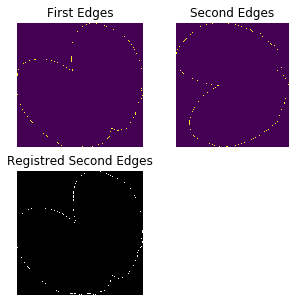

In [16]:
RecPtInt=np.rint(TY,casting='safe').astype(int)
a=np.reshape(RecPtInt,(2,RecPtInt.shape[0]))

ImgRec = np.zeros([a[1].max()+1,a[0].max()+1,3],dtype=np.uint8)
ImgRec.fill(0)

for i in RecPtInt:    
    ImgRec[i[0],i[1]]=255


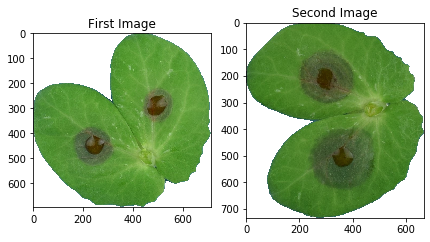

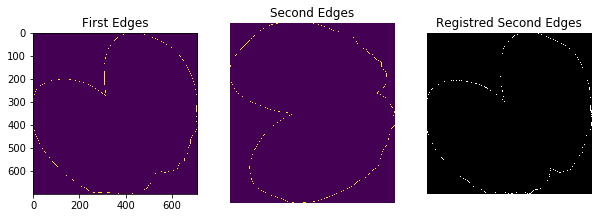

In [21]:
fig = plt.figure(figsize=(7, 7))
fig.add_subplot(1,2, 1) 
plt.imshow(img1) 
plt.title("First Image") 
fig.add_subplot(1,2, 2) 
plt.imshow(img2) 
plt.title("Second Image") 
plt.show()

fig = plt.figure(figsize=(10, 10)) 
fig.add_subplot(1,3, 1) 
plt.imshow(img1_c) 
plt.title("First Edges") 
fig.add_subplot(1,3, 2) 
plt.imshow(img2_c) 
plt.axis('off') 
plt.title("Second Edges") 
fig.add_subplot(1,3, 3) 
plt.imshow(ImgRec) 
plt.axis('off') 
plt.title("Registred Second Edges") 
plt.show()